In [1]:
import graphlab

In [2]:
graphlab.canvas.set_target('ipynb')

In [3]:
taps = graphlab.SFrame.read_csv("data/thousand_taps_f.csv")

This non-commercial license of GraphLab Create for academic use is assigned to jenarvaezg@gmail.com and will expire on December 12, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\JOSENR~1\AppData\Local\Temp\graphlab_server_1488219582.log.0


Finished parsing file C:\Users\José Enrique Narváez\Documents\TFM\data\thousand_taps_f.csv

Parsing completed. Parsed 100 lines in 0.329211 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[long,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,long,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str,str,str,long,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\José Enrique Narváez\Documents\TFM\data\thousand_taps_f.csv

Parsing completed. Parsed 88140 lines in 0.354345 secs.

In [4]:
print "Before", len(graphlab.SFrame.read_csv("data/taps_features_sframe.csv", verbose=False)), "and now", len(taps)

Before 11607 and now 88140


In [5]:
taps.show()

In [6]:
features = [
    "n_accel",
    
    "accel_x_mean",
    "accel_x_median",
    "accel_x_var",
    "accel_x_skewness",
    "accel_x_kurtosis",
    "accel_x_diff",
    
    "accel_y_mean",
    "accel_y_median",
    "accel_y_skewness",
    "accel_y_kurtosis",
    "accel_y_var",
    "accel_y_diff",
    
    "accel_z_mean",
    "accel_z_var",   
    "accel_z_median",
    "accel_z_skewness",
    "accel_z_kurtosis",
    "accel_z_diff",
    
    "n_gyro",
    
    "gyro_x_mean",
    "gyro_x_median",
    "gyro_x_var",
    "gyro_x_skewness",
    "gyro_x_kurtosis",
    "gyro_x_diff",
    
    "gyro_y_mean",
    "gyro_y_median",
    "gyro_y_var",
    "gyro_y_skewness",
    "gyro_y_kurtosis",
    "gyro_y_diff",
    
    "gyro_z_mean",
    "gyro_z_median",
    "gyro_z_var",
    "gyro_z_skewness",
    "gyro_z_kurtosis",
    "gyro_z_diff",
    
] 



In [7]:
train, test = taps.random_split(0.8, seed=1)

print len(taps)

print len(train)
print len(test)


88140
70641
17499


In [8]:
not_noise_train = train[train['noise'] == 0]
not_noise_test = test[test['noise'] == 0]

noise_train = train[train['noise'] == 1]
noise_test = test[test['noise'] == 1]

In [9]:
train_touchs = not_noise_train[not_noise_train['type'] == "TOUCH"]
train_swipes = not_noise_train[not_noise_train['type'] == "SWIPE"]
test_touchs = not_noise_test[not_noise_test['type'] == "TOUCH"]
test_swipes = not_noise_test[not_noise_test['type'] == "SWIPE"]

# Let's focus on boosted trees.

In [10]:
k_fold = graphlab.cross_validation.KFold(graphlab.cross_validation.shuffle(train), 5)

In [11]:
def f1_score(model, data):
    return model.evaluate(data, metric='f1_score')['f1_score']

def get_cross_val_score(k_fold, model_factory, model_params, metric_f):
    val_errors = []
    train_errors = []
    for train, valid in k_fold:
        m = model_factory(train, **model_params)
        val_errors.append(metric_f(m, valid))
        train_errors.append(metric_f(m, train))
    return sum(train_errors)/float(len(train_errors)), sum(val_errors)/float(len(val_errors))


def get_best_max_iterations(k_fold, max_iterations_a, model_factory, model_params, metric_f, plot=True):
    val_a = []
    train_a = []
    for max_iterations in max_iterations_a:
        model_params['max_iterations'] = max_iterations
        train_e, val_e = get_cross_val_score(k_fold, model_factory, model_params, metric_f)
        val_a.append(val_e)
        train_a.append(train_e)
        print "At iterations:", max_iterations, val_e, train_e
    if plot:
        %matplotlib inline

        import matplotlib
        import numpy as np
        import matplotlib.pyplot as plt

        plt.plot(max_iterations_a, val_a)
        plt.plot(max_iterations_a, train_a)
    if metric_f == f1_score:
        return max_iterations_a[val_a.index(max(val_a))], max(val_a)
    return max_iterations_a[val_a.index(min(val_a))], min(val_a)

def get_best_depth(k_fold, depths, model_factory, model_params, metric_f, plot=True):
    val_a = []
    train_a = []
    for depth in depths:
        model_params['max_depth'] = depth
        train_e, val_e = get_cross_val_score(k_fold, model_factory, model_params, metric_f)
        val_a.append(val_e)
        train_a.append(train_e)
        print "At depth:", depth, val_e, train_e
    if plot:
        %matplotlib inline

        import matplotlib
        import numpy as np
        import matplotlib.pyplot as plt

        plt.plot(depths, val_a)
        plt.plot(depths, train_a)
    if metric_f == f1_score:
        return depths[val_a.index(max(val_a))], max(val_a)
    return depths[val_errors.index(min(val_a))], min(val_a)

At iterations: 5 0.949316646591 0.949768211568
At iterations: 10 0.949738776069 0.950005923073
At iterations: 20 0.956133442448 0.956277947011
At iterations: 40 0.959700000235 0.960222249849
At iterations: 80 0.962308168129 0.963004112055
At iterations: 160 0.964524320341 0.965233257491
At iterations: 320 0.965820776625 0.966812973008
At iterations: 640 0.966767044512 0.968293797752


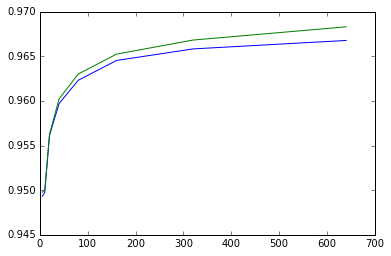

In [12]:
max_iterations_a = [5, 10, 20, 40, 80, 160, 320, 640]
model_params = dict([('target', 'noise'), ('features', features), ('verbose', False), ('validation_set', None),
                    ('max_depth', 1)])
model_factory = graphlab.boosted_trees_classifier.create
noise_max_iterations = get_best_max_iterations(k_fold, max_iterations_a, model_factory, model_params, f1_score)

At depth: 1 0.966767044512 0.968293797752
At depth: 2 0.978199001398 0.984265395348
At depth: 3 0.98495340503 0.996095605193
At depth: 4 0.987909942326 0.999934847226
At depth: 5 0.989159009459 0.999988153489
At depth: 6 0.989674390947 0.999988153684
At depth: 7 0.989798615049 0.999988153489
At depth: 8 0.990002542568 0.999988153606
At depth: 9 0.989702810199 0.999988153645


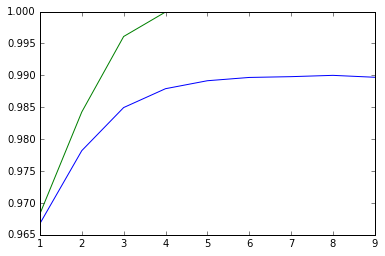

In [13]:
depths = range(1,10)
model_params['max_iterations'] = noise_max_iterations[0]
noise_max_depth = get_best_depth(k_fold, depths, model_factory, model_params, f1_score)

In [14]:
train_set_to_use = train
max_depth_to_use = noise_max_depth[0]
max_iterations_to_use = noise_max_iterations[0]

optimized_noise_classifier = graphlab.boosted_trees_classifier.create(train_set_to_use, target='noise', 
                                                                      features=features,
                                                                      max_depth=max_depth_to_use, 
                                                                      max_iterations=max_iterations_to_use)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 67218

Number of classes           : 2

Number of feature columns   : 38

Number of unpacked features : 38

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.167620     | 0.948139          | 0.943032            | 0.481717          | 0.485927            |

| 2         | 0.289705     | 0.954060          | 0.947122            | 0.363064          | 0.369451            |

| 3         | 0.415294     | 0.956291          | 0.947415            | 0.287648          | 0.296636            |

| 4         | 0.540384     | 0.959773          | 0.953842            | 0.234379          | 0.246008            |

| 5         | 0.659969     | 0.962436          | 0.952673            | 0.196561          | 0.211129            |

| 6         | 0.799068     | 0.964608          | 0.954134            | 0.169705          | 0.186661            |

| 10        | 1.238880     | 0.972299          | 0.958808            | 0.106982          | 0.133912            |

| 11        | 1.356964     | 0.973400          | 0.959100            | 0.097985          | 0.125539            |

| 20        | 2.348668     | 0.983219          | 0.965819            | 0.058939          | 0.091244            |

| 30        | 3.516998     | 0.988158          | 0.969909            | 0.045413          | 0.080523            |

| 40        | 4.892987     | 0.994168          | 0.975460            | 0.031999          | 0.068622            |

| 50        | 6.109351     | 0.996132          | 0.976921            | 0.025753          | 0.063309            |

| 51        | 6.265963     | 0.996355          | 0.976629            | 0.025083          | 0.062444            |

| 60        | 7.416780     | 0.998200          | 0.976921            | 0.019324          | 0.057181            |

| 70        | 8.463538     | 0.999122          | 0.980427            | 0.014622          | 0.054616            |

| 80        | 9.871039     | 0.999539          | 0.981011            | 0.011468          | 0.052362            |

| 90        | 10.951305    | 0.999732          | 0.981011            | 0.009324          | 0.050410            |

| 100       | 12.285754    | 0.999881          | 0.982764            | 0.007038          | 0.048799            |

| 101       | 12.413344    | 0.999896          | 0.982472            | 0.006819          | 0.048923            |

| 110       | 13.397542    | 0.999970          | 0.983640            | 0.005561          | 0.047450            |

| 120       | 14.453293    | 0.999970          | 0.983348            | 0.004605          | 0.046419            |

| 130       | 15.545068    | 0.999970          | 0.983056            | 0.003690          | 0.045398            |

| 140       | 16.589810    | 0.999970          | 0.983056            | 0.003104          | 0.045646            |

| 150       | 17.683587    | 0.999970          | 0.983640            | 0.002549          | 0.045058            |

| 160       | 18.775363    | 0.999970          | 0.983932            | 0.002216          | 0.045183            |

| 170       | 19.887152    | 0.999970          | 0.983932            | 0.001999          | 0.045001            |

| 180       | 21.014453    | 0.999970          | 0.983932            | 0.001776          | 0.045076            |

| 190       | 22.181606    | 0.999970          | 0.984517            | 0.001548          | 0.044698            |

| 200       | 23.324937    | 0.999970          | 0.984224            | 0.001361          | 0.045121            |

| 210       | 24.427720    | 0.999970          | 0.984809            | 0.001195          | 0.045321            |

| 220       | 25.572033    | 0.999970          | 0.984809            | 0.001074          | 0.045607            |

| 230       | 26.647297    | 0.999970          | 0.985101            | 0.000977          | 0.045878            |

| 240       | 27.774597    | 0.999970          | 0.984809            | 0.000891          | 0.046199            |

| 250       | 28.855865    | 0.999970          | 0.984809            | 0.000829          | 0.046087            |

| 260       | 30.027197    | 0.999970          | 0.984809            | 0.000755          | 0.046334            |

| 270       | 31.144991    | 0.999970          | 0.985101            | 0.000714          | 0.046724            |

| 280       | 32.323328    | 0.999970          | 0.985101            | 0.000664          | 0.047089            |

| 290       | 33.769856    | 0.999970          | 0.985101            | 0.000617          | 0.047379            |

| 300       | 34.903661    | 0.999970          | 0.985101            | 0.000578          | 0.047389            |

| 310       | 36.057481    | 0.999970          | 0.984809            | 0.000548          | 0.047705            |

| 320       | 37.169771    | 0.999970          | 0.985393            | 0.000517          | 0.048006            |

| 330       | 38.328094    | 0.999970          | 0.985393            | 0.000486          | 0.047932            |

| 340       | 39.440884    | 0.999970          | 0.985101            | 0.000461          | 0.048058            |

| 350       | 40.602210    | 0.999970          | 0.985101            | 0.000440          | 0.048224            |

| 360       | 41.706994    | 0.999970          | 0.985393            | 0.000419          | 0.048359            |

| 370       | 42.922357    | 0.999970          | 0.985101            | 0.000402          | 0.048785            |

| 380       | 44.139222    | 0.999970          | 0.985101            | 0.000384          | 0.049011            |

| 390       | 45.356586    | 0.999970          | 0.985393            | 0.000368          | 0.048998            |

| 400       | 46.501400    | 0.999970          | 0.985101            | 0.000351          | 0.049168            |

| 410       | 47.687242    | 0.999970          | 0.985393            | 0.000338          | 0.049331            |

| 420       | 48.847566    | 0.999970          | 0.985101            | 0.000325          | 0.049475            |

| 430       | 50.072023    | 0.999970          | 0.985393            | 0.000316          | 0.049575            |

| 440       | 51.329916    | 0.999970          | 0.985101            | 0.000304          | 0.049731            |

| 450       | 52.637846    | 0.999970          | 0.985101            | 0.000293          | 0.049910            |

| 460       | 53.777155    | 0.999970          | 0.985101            | 0.000284          | 0.049837            |

| 470       | 54.948987    | 0.999970          | 0.984809            | 0.000276          | 0.049923            |

| 480       | 56.154844    | 0.999970          | 0.984809            | 0.000269          | 0.049917            |

| 490       | 57.369240    | 0.999970          | 0.984809            | 0.000263          | 0.050058            |

| 500       | 58.541072    | 0.999970          | 0.985101            | 0.000255          | 0.050023            |

| 501       | 58.649149    | 0.999970          | 0.985101            | 0.000255          | 0.050075            |

| 510       | 59.701397    | 0.999970          | 0.985101            | 0.000249          | 0.050307            |

| 520       | 61.088382    | 0.999970          | 0.985393            | 0.000243          | 0.050381            |

| 530       | 62.433337    | 0.999970          | 0.985685            | 0.000238          | 0.050414            |

| 540       | 63.561139    | 0.999970          | 0.985685            | 0.000233          | 0.050537            |

| 550       | 64.698446    | 0.999970          | 0.985977            | 0.000227          | 0.050648            |

| 560       | 66.284075    | 0.999970          | 0.985685            | 0.000222          | 0.050804            |

| 570       | 67.809288    | 0.999970          | 0.985101            | 0.000218          | 0.050867            |

| 580       | 69.111212    | 0.999970          | 0.985393            | 0.000214          | 0.050845            |

| 590       | 70.461171    | 0.999970          | 0.985393            | 0.000210          | 0.051010            |

| 600       | 71.685040    | 0.999970          | 0.985393            | 0.000206          | 0.050899            |

| 610       | 73.275169    | 0.999970          | 0.985101            | 0.000203          | 0.050945            |

| 620       | 74.431491    | 0.999970          | 0.985393            | 0.000199          | 0.050951            |

| 630       | 75.669887    | 0.999970          | 0.985393            | 0.000195          | 0.051152            |

| 640       | 76.913771    | 0.999970          | 0.985393            | 0.000192          | 0.051326            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [16]:
print optimized_noise_classifier.evaluate(test)

{'f1_score': 0.9910082265161659, 'auc': 0.9957364902319574, 'recall': 0.9919571045576407, 'precision': 0.9900611620795107, 'log_loss': 0.056585071649908704, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+----------------+----------------+-------+------+
| threshold |      fpr       |      tpr       |   p   |  n   |
+-----------+----------------+----------------+-------+------+
|    0.0    |      1.0       |      1.0       | 15666 | 1833 |
|   1e-05   | 0.849972722313 | 0.999936167496 | 15666 | 1833 |
|   2e-05   | 0.80250954719  | 0.999936167496 | 15666 | 1833 |
|   3e-05   | 0.774140752864 | 0.999872334993 | 15666 | 1833 |
|   4e-05   | 0.74904528096  | 0.999872334993 | 15666 | 1833 |
|   5e-05   | 0.735951991271 | 0.999808502489 | 15666 | 1833 |
|   6e-05   | 0.71958537916  | 0.999808502489 | 15666 | 1833 |
|   7e-05   | 0.702127659574 | 0.999808502489 | 15666 | 1833 |
|   8e-05   | 0.695035460993 | 0.999808502489 | 15666 

In [17]:
predicted_not_noise = test[optimized_noise_classifier.predict(test) == 0]

# Type classifier now

In [18]:
not_noise_k_fold = graphlab.cross_validation.KFold(graphlab.cross_validation.shuffle(not_noise_train), 5)

At iterations: 5 0.996465484494 0.99833492885
At iterations: 10 0.9990689892 0.999767791187
At iterations: 20 0.999831577036 1.0
At iterations: 40 0.999831577036 1.0
At iterations: 80 0.999831577036 1.0
At iterations: 160 0.999831577036 1.0
At iterations: 320 0.999831577036 1.0
At iterations: 640 0.999831577036 1.0


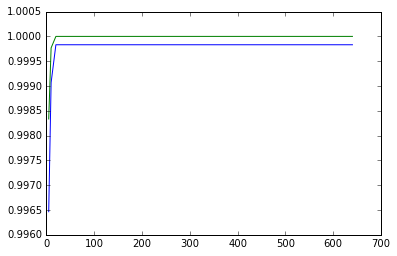

In [19]:
model_params = dict([('target', 'type'), ('features', features), ('verbose', False), ('validation_set', None)])
model_factory = graphlab.boosted_trees_classifier.create
type_max_iterations = get_best_max_iterations(not_noise_k_fold, max_iterations_a, model_factory, 
                                              model_params, f1_score)

At depth: 1 0.982638113941 0.983811919394
At depth: 2 0.993455296716 0.995555930283
At depth: 3 0.997978474544 0.999535381725
At depth: 4 0.998904336399 0.999873327805
At depth: 5 0.999409634089 0.999915517717
At depth: 6 0.999831577036 1.0
At depth: 7 0.999240143534 1.0
At depth: 8 0.999661142244 1.0
At depth: 9 0.999492994776 1.0


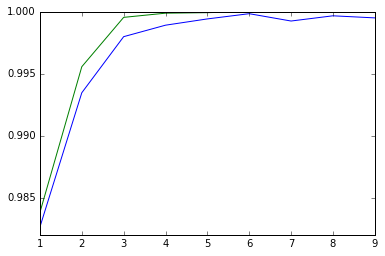

In [20]:
depths = range(1,10)

model_params['max_iterations'] = type_max_iterations[0]
type_max_depth = get_best_depth(not_noise_k_fold, depths, model_factory, model_params, f1_score)

In [21]:
train_set_to_use = not_noise_train
max_depth_to_use = type_max_depth[0]
max_iterations_to_use = type_max_iterations[0]

optimized_type_classifier = graphlab.boosted_trees_classifier.create(train_set_to_use, target='type', features=features,
                                                                     max_depth=max_depth_to_use, max_iterations=max_iterations_to_use)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 6958

Number of classes           : 2

Number of feature columns   : 38

Number of unpacked features : 38

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.019013     | 0.983760          | 0.989218            | 0.454171          | 0.451364            |

| 2         | 0.030021     | 0.989940          | 0.994609            | 0.316027          | 0.309448            |

| 3         | 0.042029     | 0.993245          | 0.997305            | 0.226254          | 0.220395            |

| 4         | 0.059542     | 0.993820          | 0.997305            | 0.165450          | 0.159960            |

| 5         | 0.075066     | 0.996407          | 0.997305            | 0.120863          | 0.117782            |

| 6         | 0.089563     | 0.997988          | 0.997305            | 0.088999          | 0.087295            |

| 11        | 0.157112     | 0.999856          | 0.997305            | 0.021409          | 0.024665            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [23]:
print optimized_type_classifier.evaluate(predicted_not_noise)

predicted_touches = predicted_not_noise[optimized_type_classifier.predict(predicted_not_noise) == "TOUCH"]
predicted_swipes = predicted_not_noise[optimized_type_classifier.predict(predicted_not_noise) == "SWIPE"]

{'f1_score': 0.6501911892562612, 'auc': 0.9999999999999986, 'recall': 0.6666666666666666, 'precision': 0.9524225001005187, 'log_loss': 2.417152000745492, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+------+-----+
| threshold | fpr | tpr |  p   |  n  |
+-----------+-----+-----+------+-----+
|    0.0    | 1.0 | 1.0 | 1341 | 336 |
|   1e-05   | 1.0 | 1.0 | 1341 | 336 |
|   2e-05   | 1.0 | 1.0 | 1341 | 336 |
|   3e-05   | 1.0 | 1.0 | 1341 | 336 |
|   4e-05   | 1.0 | 1.0 | 1341 | 336 |
|   5e-05   | 1.0 | 1.0 | 1341 | 336 |
|   6e-05   | 1.0 | 1.0 | 1341 | 336 |
|   7e-05   | 1.0 | 1.0 | 1341 | 336 |
|   8e-05   | 1.0 | 1.0 | 1341 | 336 |
|   9e-05   | 1.0 | 1.0 | 1341 | 336 |
+-----------+-----+-----+------+-----+
[100001 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'confusion_matrix': Columns:
	target_label	str
	p

# Let's classify swipes

In [24]:
swipes_k_fold = graphlab.cross_validation.KFold(graphlab.cross_validation.shuffle(train_swipes), 5)

At iterations: 5 0.985897069005 0.998772618114
At iterations: 10 0.988307560408 1.0
At iterations: 20 0.992352344532 1.0
At iterations: 40 0.99343992808 1.0
At iterations: 80 0.992264261641 1.0
At iterations: 160 0.992264261641 1.0
At iterations: 320 0.992264261641 1.0
At iterations: 640 0.992264261641 1.0


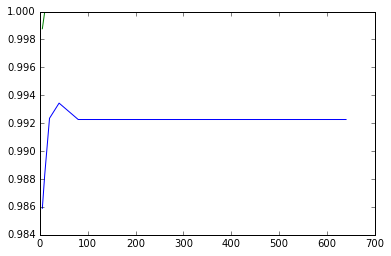

In [25]:
model_params = dict([('target', 'action'), ('features', features), ('verbose', False), ('validation_set', None)])
model_factory = graphlab.boosted_trees_classifier.create
swipe_max_iterations = get_best_max_iterations(swipes_k_fold, max_iterations_a, model_factory, model_params, f1_score)

At depth: 1 0.969991469246 0.986017810652
At depth: 2 0.993057224006 1.0
At depth: 3 0.990289859955 1.0
At depth: 4 0.992554518695 1.0
At depth: 5 0.992716545671 1.0
At depth: 6 0.99343992808 1.0
At depth: 7 0.99343992808 1.0
At depth: 8 0.992264261641 1.0
At depth: 9 0.99343992808 1.0


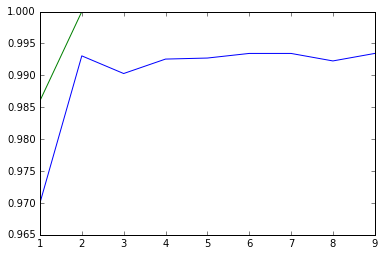

In [26]:
depths = range(1,10)

model_params['max_iterations'] = swipe_max_iterations[0]
swipe_max_depth = get_best_depth(swipes_k_fold, depths, model_factory, model_params, f1_score)

In [27]:
train_set_to_use = train_swipes
max_depth_to_use = swipe_max_depth[0]
max_iterations_to_use = swipe_max_iterations[0]

optimized_swipe_classifier = graphlab.boosted_trees_classifier.create(train_set_to_use, target='action', features=features,
                                                                     max_depth=max_depth_to_use, max_iterations=max_iterations_to_use)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 1344

Number of classes           : 4

Number of feature columns   : 38

Number of unpacked features : 38

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.012508     | 0.996280          | 1.000000            | 0.873910          | 0.864526            |

| 2         | 0.020514     | 0.994048          | 1.000000            | 0.603378          | 0.591352            |

| 3         | 0.033023     | 0.997768          | 1.000000            | 0.430249          | 0.421833            |

| 4         | 0.043031     | 0.997768          | 1.000000            | 0.312209          | 0.304306            |

| 5         | 0.052037     | 0.998512          | 1.000000            | 0.229185          | 0.221838            |

| 6         | 0.060543     | 0.998512          | 1.000000            | 0.169548          | 0.163651            |

| 11        | 0.098069     | 1.000000          | 1.000000            | 0.041324          | 0.039110            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [28]:
print optimized_swipe_classifier.evaluate(predicted_swipes)

{'f1_score': 0.7976331360946746, 'auc': 1.0000000000000007, 'recall': 0.8, 'precision': 0.9941520467836258, 'log_loss': 0.4079712637363098, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int
	class	int

Rows: 400004

Data:
+-----------+-----+-----+-----+-----+-------+
| threshold | fpr | tpr |  p  |  n  | class |
+-----------+-----+-----+-----+-----+-------+
|    0.0    | 1.0 | 1.0 | 167 | 169 |   0   |
|   1e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   2e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   3e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   4e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   5e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   6e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   7e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   8e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
|   9e-05   | 1.0 | 1.0 | 167 | 169 |   0   |
+-----------+-----+-----+-----+-----+-------+
[400004 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, nu

# Let's go with touch classifier

In [29]:
touches_k_fold = graphlab.cross_validation.KFold(graphlab.cross_validation.shuffle(train_touchs), 5)

At iterations: 5 0.928480586084 0.975865137561
At iterations: 10 0.950409632186 0.989739334708
At iterations: 20 0.967396967769 0.99941782037
At iterations: 40 0.977818767656 1.0
At iterations: 80 0.98152989137 1.0
At iterations: 160 0.982918360296 1.0
At iterations: 320 0.984196259403 1.0
At iterations: 640 0.984938930138 1.0


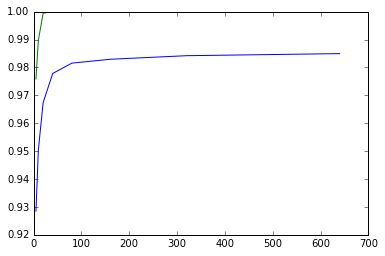

In [30]:
model_params = dict([('target', 'action'), ('features', features), ('verbose', False), ('validation_set', None)])
model_factory = graphlab.boosted_trees_classifier.create
touch_max_iterations = get_best_max_iterations(touches_k_fold, max_iterations_a, model_factory, model_params, f1_score)

At depth: 1 0.993388728622 1.0
At depth: 2 0.99500242514 1.0
At depth: 3 0.994288843433 1.0
At depth: 4 0.992092433963 1.0
At depth: 5 0.992264261641 1.0
At depth: 6 0.992264261641 1.0
At depth: 7 0.992264261641 1.0
At depth: 8 0.992264261641 1.0
At depth: 9 0.992264261641 1.0


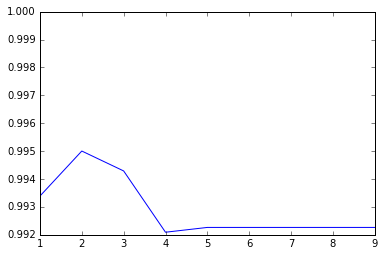

In [31]:
depths = range(1,10)

model_params['max_iterations'] = touch_max_iterations[0]
touch_max_depth = get_best_depth(swipes_k_fold, depths, model_factory, model_params, f1_score)

In [32]:
train_set_to_use = train_touchs
max_depth_to_use = touch_max_depth[0]
max_iterations_to_use = touch_max_iterations[0]

optimized_touch_classifier = graphlab.boosted_trees_classifier.create(train_set_to_use, target='action', features=features,
                                                                     max_depth=max_depth_to_use, max_iterations=max_iterations_to_use)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 5625

Number of classes           : 9

Number of feature columns   : 38

Number of unpacked features : 38

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training-accuracy | Validation-accuracy | Training-log_loss | Validation-log_loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.036523     | 0.626667          | 0.629252            | 1.784315          | 1.792583            |

| 2         | 0.078053     | 0.664178          | 0.636054            | 1.573977          | 1.611406            |

| 3         | 0.115580     | 0.696000          | 0.663265            | 1.426219          | 1.479440            |

| 4         | 0.149104     | 0.718400          | 0.670068            | 1.305374          | 1.376941            |

| 5         | 0.187631     | 0.728889          | 0.670068            | 1.208941          | 1.288685            |

| 6         | 0.234164     | 0.744533          | 0.676871            | 1.121854          | 1.202165            |

| 11        | 0.416794     | 0.809422          | 0.748299            | 0.834284          | 0.927595            |

| 50        | 1.513077     | 0.960711          | 0.911565            | 0.264839          | 0.350129            |

| 51        | 1.548602     | 0.962489          | 0.914966            | 0.259417          | 0.343894            |

| 100       | 2.838019     | 0.992356          | 0.962585            | 0.106782          | 0.184397            |

| 101       | 2.869541     | 0.992533          | 0.962585            | 0.105241          | 0.182672            |

| 150       | 4.233606     | 0.999467          | 0.959184            | 0.048457          | 0.118080            |

| 200       | 5.552043     | 1.000000          | 0.965986            | 0.023936          | 0.089484            |

| 250       | 6.910509     | 1.000000          | 0.969388            | 0.012625          | 0.076597            |

| 300       | 8.270975     | 1.000000          | 0.969388            | 0.007263          | 0.067378            |

| 350       | 9.881619     | 1.000000          | 0.972789            | 0.004519          | 0.060262            |

| 400       | 11.447805    | 1.000000          | 0.976190            | 0.003044          | 0.055164            |

| 450       | 12.741225    | 1.000000          | 0.986395            | 0.002177          | 0.050940            |

| 500       | 14.128221    | 1.000000          | 0.986395            | 0.001645          | 0.048531            |

| 501       | 14.161744    | 1.000000          | 0.986395            | 0.001637          | 0.048411            |

| 550       | 16.005054    | 1.000000          | 0.986395            | 0.001301          | 0.046971            |

| 600       | 17.303476    | 1.000000          | 0.986395            | 0.001053          | 0.046131            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [33]:
print optimized_touch_classifier.evaluate(predicted_touches)

{'f1_score': 0.848357960433734, 'auc': 0.9999181248025041, 'recall': 0.8881837686383683, 'precision': 0.9025277601950269, 'log_loss': 2.9077818603475563, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int
	class	int

Rows: 900009

Data:
+-----------+----------------+-----+-----+------+-------+
| threshold |      fpr       | tpr |  p  |  n   | class |
+-----------+----------------+-----+-----+------+-------+
|    0.0    |      1.0       | 1.0 | 116 | 1225 |   0   |
|   1e-05   | 0.262040816327 | 1.0 | 116 | 1225 |   0   |
|   2e-05   | 0.218775510204 | 1.0 | 116 | 1225 |   0   |
|   3e-05   | 0.184489795918 | 1.0 | 116 | 1225 |   0   |
|   4e-05   | 0.167346938776 | 1.0 | 116 | 1225 |   0   |
|   5e-05   | 0.151836734694 | 1.0 | 116 | 1225 |   0   |
|   6e-05   | 0.143673469388 | 1.0 | 116 | 1225 |   0   |
|   7e-05   | 0.135510204082 | 1.0 | 116 | 1225 |   0   |
|   8e-05   | 0.127346938776 | 1.0 | 116 | 1225 |   0   |
|   9e-05   | 0.123265306122 | 1.0 | 116 | 